In [12]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
from pandas import read_excel

## 데이터 가져오기

In [13]:
교통사고xlsx = read_excel('http://itpaper.co.kr/data/traffic.xlsx', engine='openpyxl')
교통사고xlsx

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


## 데이터 전처리 (년도별 합계)

In [14]:
교통사고tmp = 교통사고xlsx.filter(['년도', '발생건수', '사망자수' ,'부상자수'])
교통사고df = 교통사고tmp.groupby(['년도']).sum()
교통사고df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [16]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

### 서브플롯 영역 나누기

- 2행 3열을 갖는 서브플롯 영역 생성

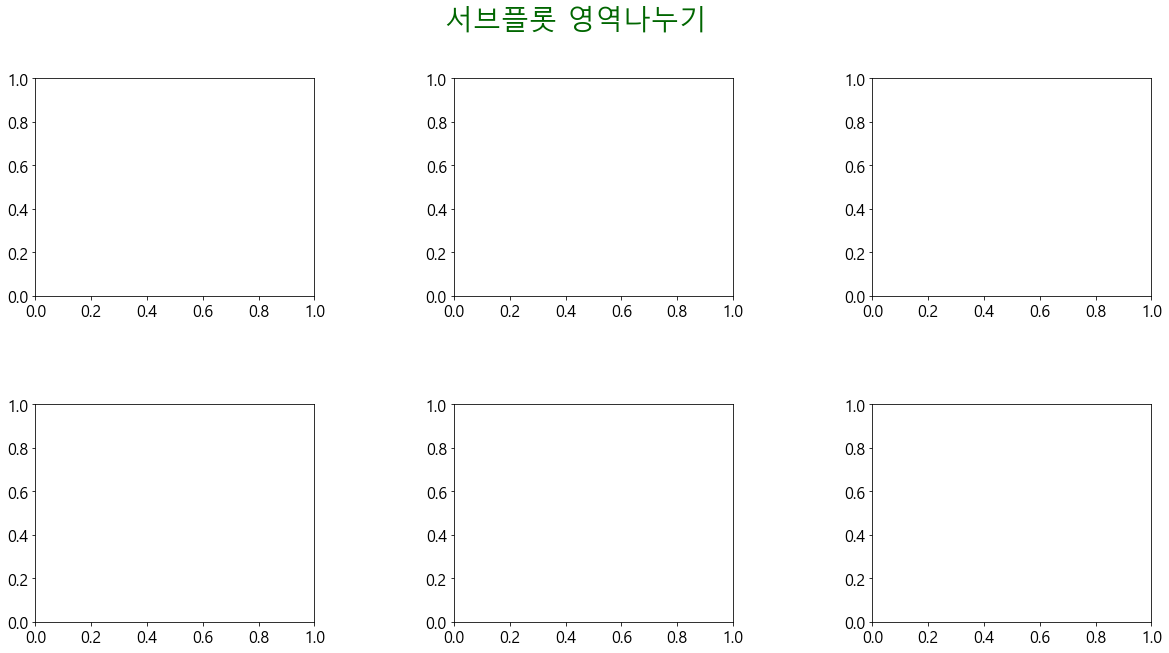

In [19]:
fig, ax = plt.subplots(2,3)

fig.suptitle('서브플롯 영역나누기', fontsize = 28, color='#006600') #super title 인듯

# 그래프 간격 조정
fig.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

### 상자그림 서브 플롯

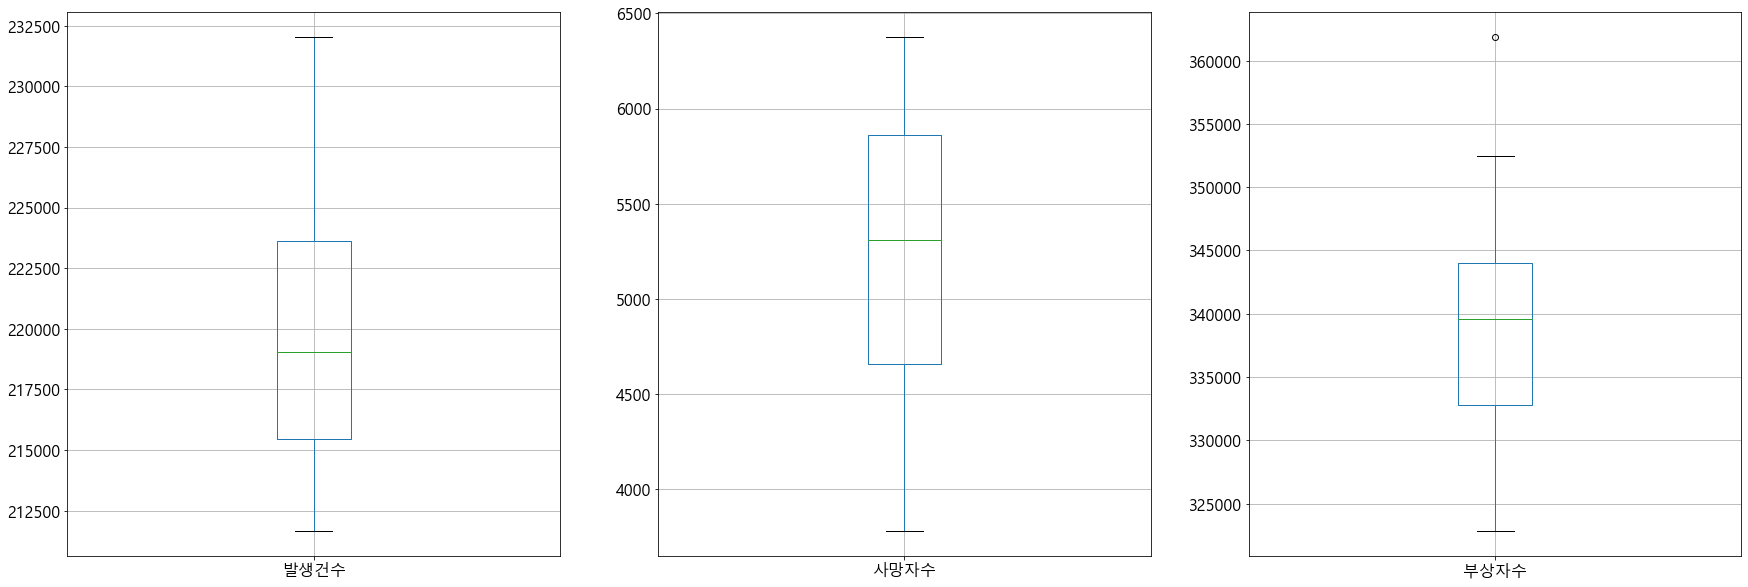

In [22]:
fig, ax = plt.subplots(1,3, figsize = (30,10))

교통사고df.boxplot(['발생건수'],ax = ax[0])
교통사고df.boxplot(['사망자수'],ax = ax[1])
교통사고df.boxplot(['부상자수'],ax = ax[2])

plt.show()

### 서브플롯에 그래프 그리기

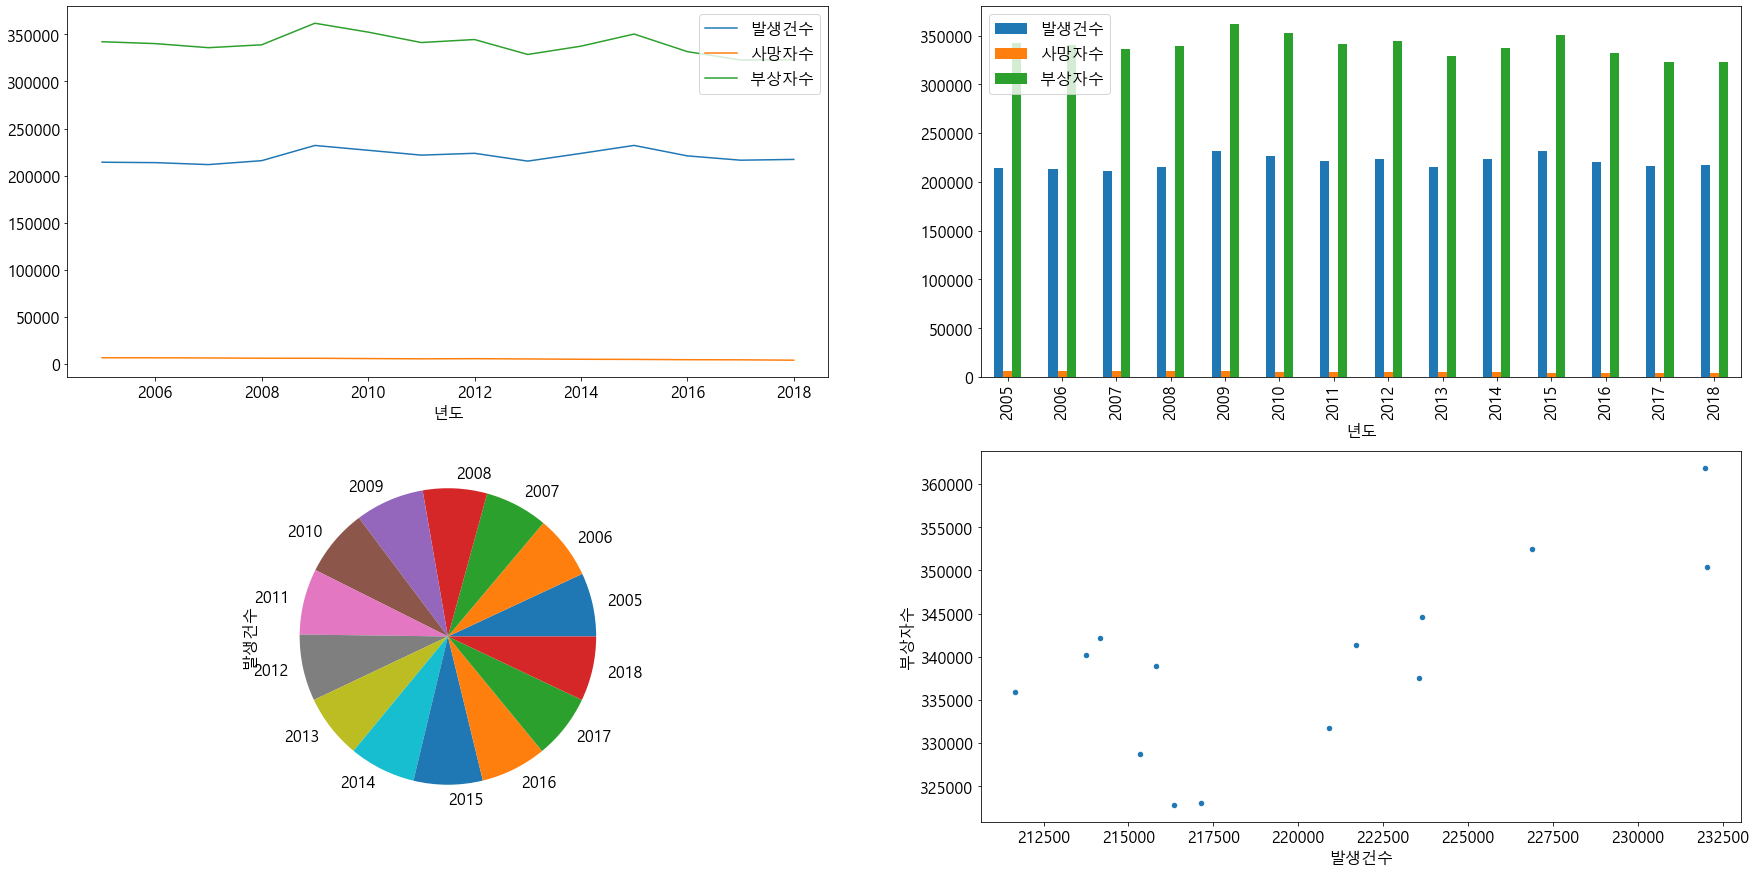

In [24]:
fig, ax = plt.subplots(2,2, figsize = (30,15))

교통사고df.plot(ax = ax[0][0]) # 선
교통사고df.plot.bar(ax = ax[0][1]) # 막대
교통사고df['발생건수'].plot.pie(ax = ax[1][0]) # 파이
교통사고df.plot.scatter(x = '발생건수',y = '부상자수', ax = ax[1][1]) # 산점도

plt.show()

### 서브플롯 영역에 옵션 지정

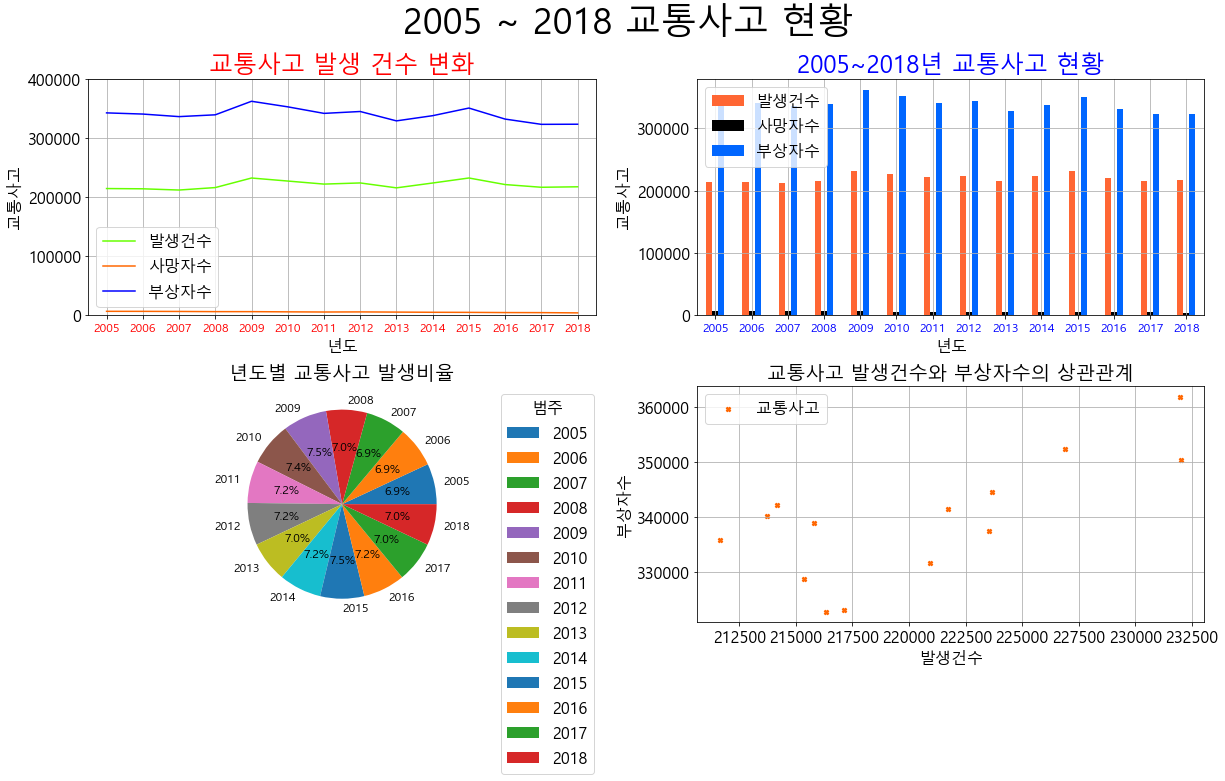

In [49]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

# 전체 제목 설정
fig.suptitle('2005 ~ 2018 교통사고 현황', fontsize = 36, color='#000000')

# 그래프 간격 설정
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# 선그래프 시작
# ----------------------------------------------

교통사고df.plot(ax = ax1, color=['#66ff00', '#ff6600', '#0000ff'])

ax1.grid()

# 1번 그래프 제목
ax1.title.set_text('교통사고 발생 건수 변화')
ax1.title.set_fontsize(24)
ax1.title.set_color('#ff0000')

# x축 y축 이름설정
ax1.set(xlabel='년도', ylabel='교통사고')

start = min(교통사고df.index)
end = max(교통사고df.index)

ax1.set_xticks(np.arange(start, end+1))
ax1.set_xticklabels(교통사고df.index, fontsize=12, color='#ff0000')

ax1.set_xlim([start - 0.5, end + 0.5])
ax1.set_ylim([0, 400000])

# 막대그래프 시작
# ----------------------------------------------

교통사고df.plot.bar(ax = ax2, rot = 0, color = ['#ff6633', '#000000', '#0066ff'])

ax2.grid()

# 그래프 제목의 텍스트, 글자크기, 색상
ax2.title.set_text("2005~2018년 교통사고 현황")
ax2.title.set_fontsize(24)
ax2.title.set_color('#0000ff')

# 막대그래프의 xticks는 무조건 0부터 시작
ax2.set_xticks(np.arange(0, len(교통사고df)))
ax2.set_xticklabels(교통사고df.index, fontsize = 12, color='#0000ff')

# x축 y축 이름
ax2.set(xlabel = '년도' , ylabel='교통사고')

# 파이그래프 시작
# ----------------------------------------------

교통사고df['발생건수'].plot.pie(ax = ax3, labels = 교통사고df.index, autopct='%0.1f%%', textprops={'color': '#000000','fontsize': 12})

ax3.title.set_text('년도별 교통사고 발생비율')
ax3.set(ylabel = None)
ax3.legend(labels=교통사고df.index, title = '범주', bbox_to_anchor=(1.6,1))

# 산점도 그래프 시작
# ----------------------------------------------
교통사고df.plot.scatter(ax = ax4, x = '발생건수', y = '부상자수', color='#ff6600', marker='X', label='교통사고' )

ax4.title.set_text('교통사고 발생건수와 부상자수의 상관관계')
ax4.grid()
ax4.set(xlabel = '발생건수', ylabel = '부상자수')

plt.show()

### 두 개의 y축을 갖는 그래프

In [50]:
x = list(range(0,10))
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
y1 = np.arange(0,10,1)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
y2 = np.arange(0,5,0.5)
y2

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

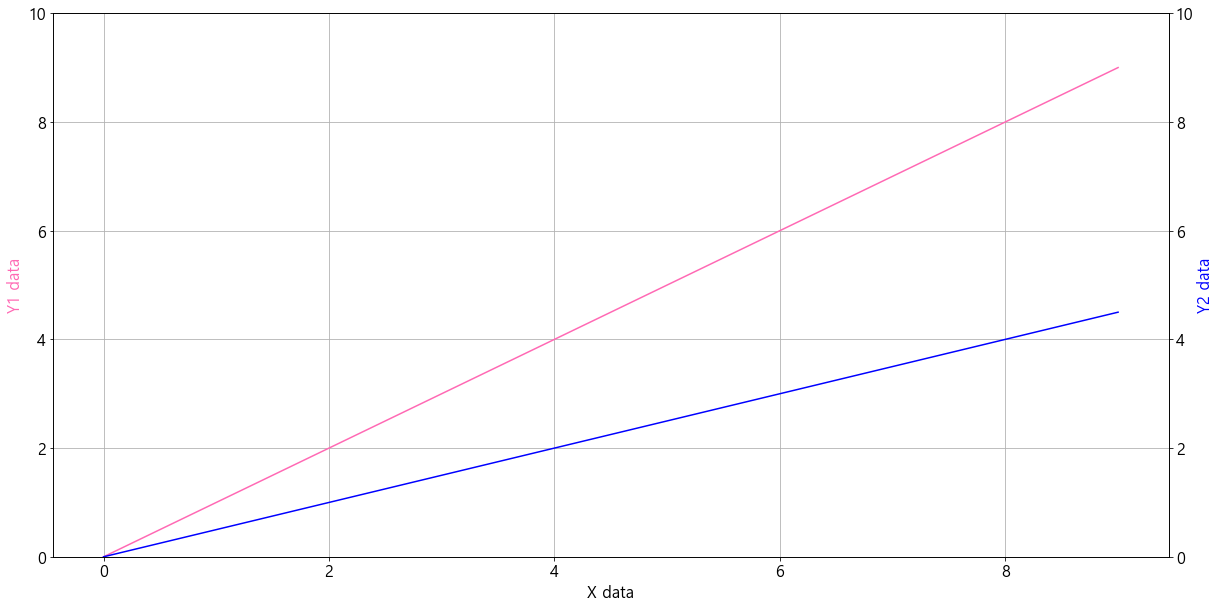

In [61]:
fig, ax1 = plt.subplots(1,1)

# ax1에 겹쳐지는 서브플롯 생성
ax2 = ax1.twinx()

ax1.plot(x, y1, color = 'hotpink')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='hotpink')
ax1.grid()
ax1.set_ylim([0,10])

ax2.plot(x, y2, color = 'blue')
ax2.set_ylabel('Y2 data', color = 'blue')
ax2.set_ylim([0, 10])

plt.show()

### 교통사고 발생건수와 부상자수 변화 시각화하기


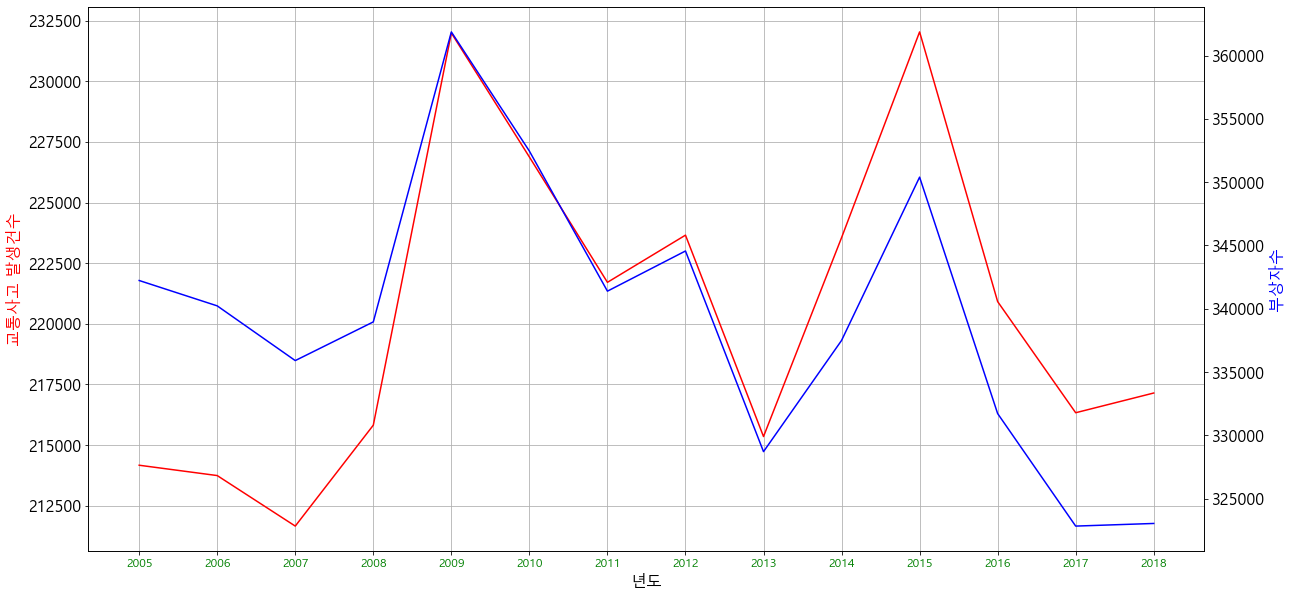

In [78]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

교통사고df['발생건수'].plot(ax = ax1, color = 'red')
ax1.grid()
ax1.set_xlabel('년도')
ax1.set_ylabel('교통사고 발생건수', color = 'red')

start = min(교통사고df.index)
end = max(교통사고df.index)
ax1.set_xticks(np.arange(start, end + 1))
ax1.set_xticklabels(교통사고df.index, fontsize = 12, color = 'green')

교통사고df['부상자수'].plot(ax = ax2, color = 'blue')
ax2.set_ylabel('부상자수', color = 'blue')

plt.show()